<h1><center>Projet ACV</center></h1>

# Imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Filtres Canny

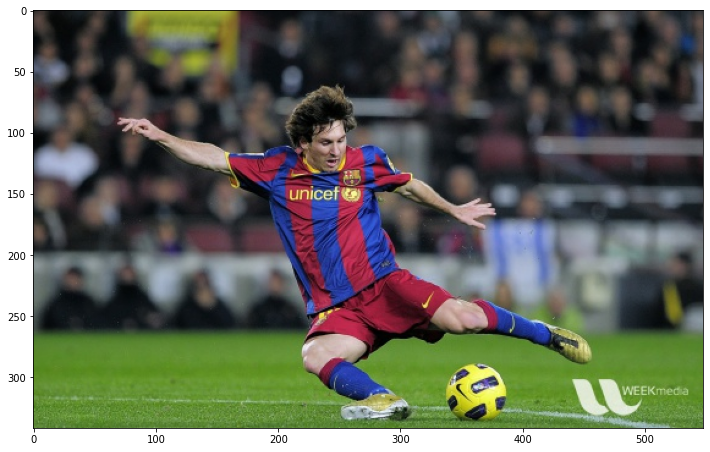

In [4]:
image = cv2.imread('../../data/messi.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

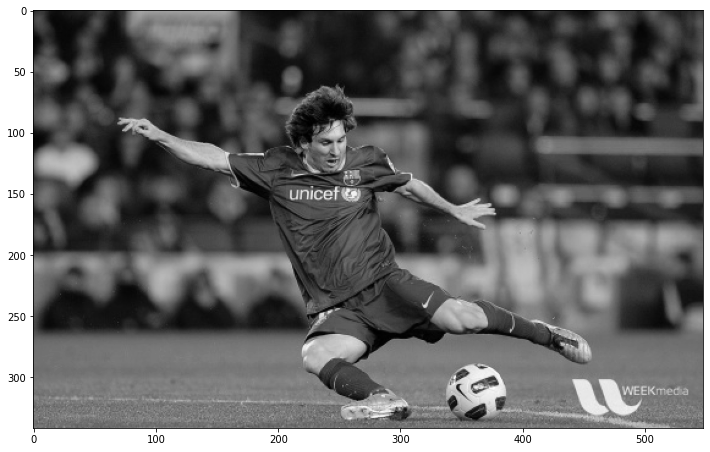

In [5]:
#To use Canny, we need to convert our image to grayscale,
img_grey = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img_grey, cmap='gray')

Canny Edge Detection is an algorithm used to extract edges from images.

Param:
- Performs noise reduction with a Gaussian Blur;
- Gets the gradient direction and magnitude with a Sobel kernel.


Sobel kernel: The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. 

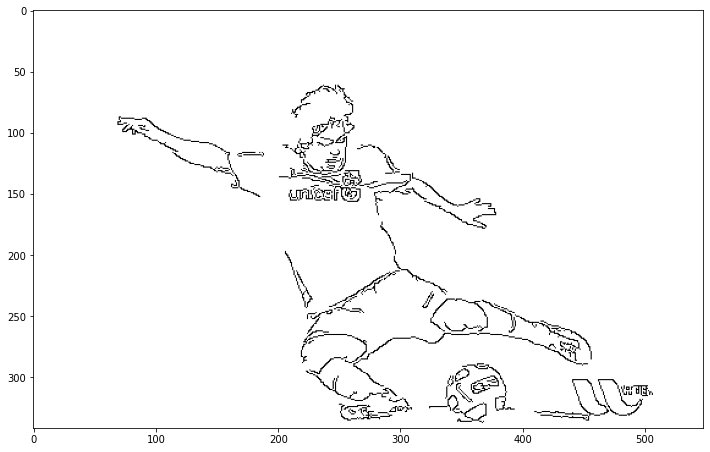

In [6]:
img_edge = cv2.Canny(img_grey, 150, 500)

fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img_edge, cmap='Greys')

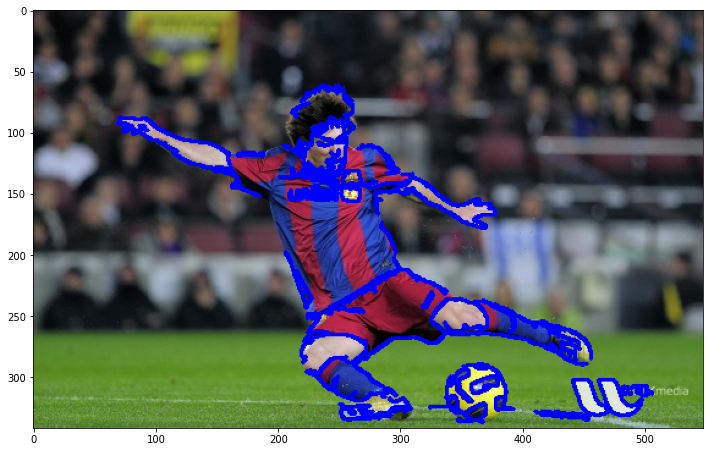

In [7]:
# .findContours and .drawContours
contours = cv2.findContours(img_edge, 
                            cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours[0], -1, (0,0,255), thickness = 2)

fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


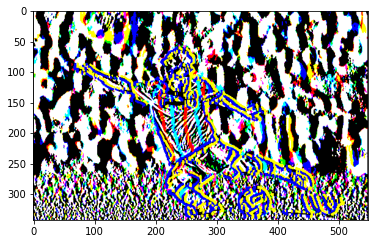

In [9]:
# Calculation of Sobelx
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)

plt.imshow(sobelx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


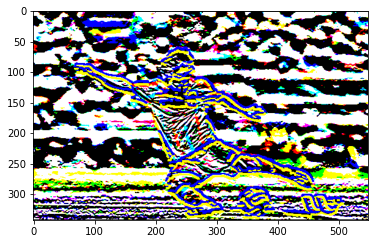

In [11]:
# Calculation of Sobely
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

plt.imshow(sobely)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


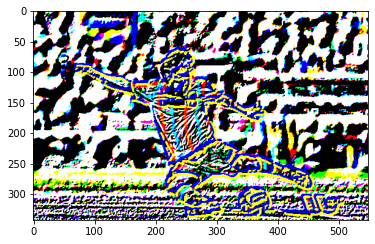

In [15]:
plt.imshow(sobelx+sobely)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


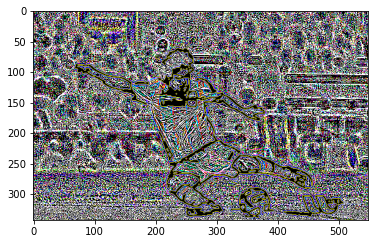

In [12]:
# Calculation of Laplacian
laplacian = cv2.Laplacian(image,cv2.CV_64F)

plt.imshow(laplacian)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


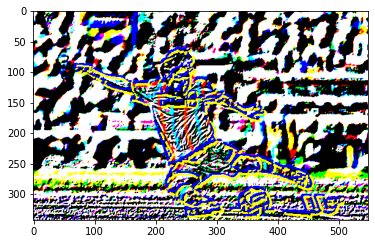

In [14]:
plt.imshow(sobelx+sobely+laplacian)

In [36]:
Gx = np.array([[-1, 0 ,1],[-2 ,0 ,2],[-1, 0, 1]])
Gy = np.array([[-1, -2 ,-1],[0 ,0 ,0],[1, 2, 1]])

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
def sobel(A): 
    # INPUT :two dimensional image array
    Gx = np.array([[-1, 0 ,1],[-2 ,0 ,2],[-1, 0, 1]])
    Gy = np.array([[-1, -2 ,-1],[0 ,0 ,0],[1, 2, 1]])

    rows = A.shape[0]
    columns = A.shape[1]
    mag = zeros(A)

    for i=1:rows-2
        for j=1:columns-2
            S1 = sum(sum(Gx.*A(i:i+2,j:j+2)))
            S2 = sum(sum(Gy.*A(i:i+2,j:j+2)))

            mag(i+1, j+1) = sqrt(S1.^2+S2.^2)
        end for
    end for

    threshold = 70 %varies for application [0 255]
    output_image = max(mag, threshold)
    output_image(output_image == round(threshold)) = 0;
    return output_image
end function


# Quadrillage

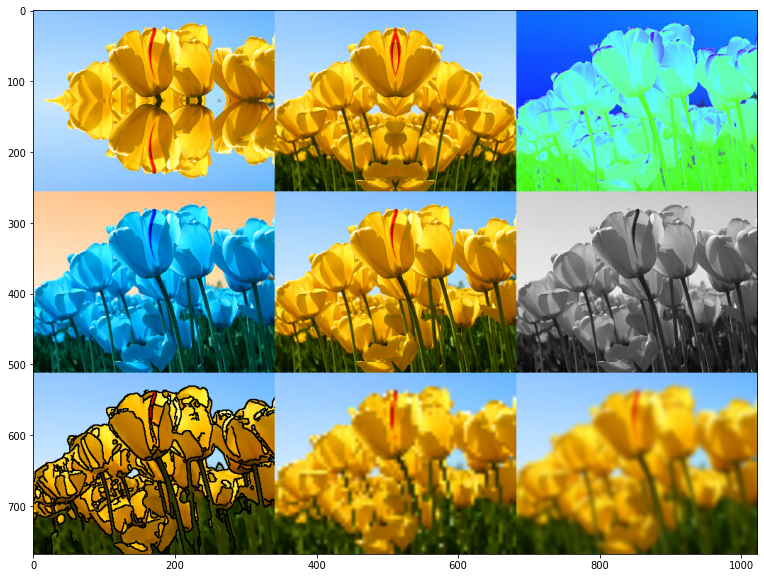

In [12]:
def quadrillage_filtre(image):
    '''Pour l'image donnée en entrée, la fonction affiche un quadrillage en 3 par 3 de l'image transformée par les filtres.
    Les filtres sont fournis en tant que liste de variables.'''
    
    list_filtres = [filtre_miroir_horiz,filtre_miroir_vertic,to_HSV,to_RGB,filtre_gray,filtre_cartoon,filtre_pixel,filtre_flou]

    newheight = image.shape[0]//3
    newwidth = image.shape[1]//3
    img_resized = cv2.resize(image, dsize=(newwidth,newheight)) # on resize l'image de départ en la divisant par 3. attention : width avant height
    quadrillage = np.zeros((img_resized.shape[0]*3, img_resized.shape[1]*3, 3), 'uint8') #création d'un quadrillage vide


    def no_filter(image): # on crée un filtre pour afficher l'image originale
        return image  

    filtres = list_filtres[:4] + [no_filter] + list_filtres[4:] # on veut que l'image originale soit au milieu du quadrillage
    
    for y in range(3): # pour chaque colonne
        for x in range(3): # pour chaque ligne
            filtre = filtres[3*y+x] # sélection du filtre à appliquer parmi la liste
            img_filtree = filtre(img_resized)
            quadrillage[y*newheight:(y+1)*newheight,x*newwidth:(x+1)*newwidth] = img_filtree

    return quadrillage

# TEST FONCTION
quadrillage = quadrillage_filtre(tulips)

plt.figure()
plt.imshow(quadrillage)

# Caméra

## Fonctions de base

In [13]:
def show_image(image):
    cv2.imshow('', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [18]:
def run_filter_on_camera(image_filter):
    cap = cv2.VideoCapture(-1)

    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Our operations on the frame come here
        result_image = image_filter(frame)

        # Display the resulting frame
        cv2.imshow('frame', result_image)

        # We break out of the loop if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

## Filtres dynamiques

In [10]:
def black_and_white(image):
    return_image = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return_image[:, :, 0] = gray
    return_image[:, :, 1] = gray
    return_image[:, :, 2] = gray
    
    return return_image

In [93]:
run_filter_on_camera(black_and_white)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to tar

In [19]:
run_filter_on_camera(filtre_cartoon)

QObject::moveToThread: Current thread (0x5627f54f0a60) is not the object's thread (0x5627f54c3940).
Cannot move to target thread (0x5627f54f0a60)

QObject::moveToThread: Current thread (0x5627f54f0a60) is not the object's thread (0x5627f54c3940).
Cannot move to target thread (0x5627f54f0a60)

QObject::moveToThread: Current thread (0x5627f54f0a60) is not the object's thread (0x5627f54c3940).
Cannot move to target thread (0x5627f54f0a60)

QObject::moveToThread: Current thread (0x5627f54f0a60) is not the object's thread (0x5627f54c3940).
Cannot move to target thread (0x5627f54f0a60)

QObject::moveToThread: Current thread (0x5627f54f0a60) is not the object's thread (0x5627f54c3940).
Cannot move to target thread (0x5627f54f0a60)

QObject::moveToThread: Current thread (0x5627f54f0a60) is not the object's thread (0x5627f54c3940).
Cannot move to target thread (0x5627f54f0a60)

QObject::moveToThread: Current thread (0x5627f54f0a60) is not the object's thread (0x5627f54c3940).
Cannot move to tar

In [16]:
run_filter_on_camera(quadrillage_filtre)

QObject::moveToThread: Current thread (0x5647fc782190) is not the object's thread (0x5647fca21fa0).
Cannot move to target thread (0x5647fc782190)

QObject::moveToThread: Current thread (0x5647fc782190) is not the object's thread (0x5647fca21fa0).
Cannot move to target thread (0x5647fc782190)

QObject::moveToThread: Current thread (0x5647fc782190) is not the object's thread (0x5647fca21fa0).
Cannot move to target thread (0x5647fc782190)

QObject::moveToThread: Current thread (0x5647fc782190) is not the object's thread (0x5647fca21fa0).
Cannot move to target thread (0x5647fc782190)

QObject::moveToThread: Current thread (0x5647fc782190) is not the object's thread (0x5647fca21fa0).
Cannot move to target thread (0x5647fc782190)

QObject::moveToThread: Current thread (0x5647fc782190) is not the object's thread (0x5647fca21fa0).
Cannot move to target thread (0x5647fc782190)

QObject::moveToThread: Current thread (0x5647fc782190) is not the object's thread (0x5647fca21fa0).
Cannot move to tar

## Holistic

In [4]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

import numpy as np
import cv2 # librairie OpenCV
import mediapipe as mp

drawing_utils = mp.solutions.drawing_utils
drawing_styles = mp.solutions.drawing_styles

In [5]:
def run_filter_with_mediapipe_model(mediapipe_model, mediapipe_based_filter):
    cap = cv2.VideoCapture(-1)
    
    with mediapipe_model as model:
        while cap.isOpened():
            success, image = cap.read()

            if not success:
                print("Ignoring empty camera frame.")
                continue     # If loading a video, use 'break' instead of 'continue'.

            # Flip the image horizontally for a later selfie-view display, and convert
            # the BGR image to RGB.
            image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

            results = model.process(image)

            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            result_image = mediapipe_based_filter(image, results)
            
            cv2.imshow('MediaPipe', result_image)

            if cv2.waitKey(5) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

In [6]:
Holistic = mp.solutions.holistic.Holistic

### Filtre holistic de base

In [7]:
def draw_holistic_results(image, results, show_hands=True, show_face=True, show_pose=False):
    if show_hands:
        drawing_utils.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp.solutions.holistic.HAND_CONNECTIONS,
            connection_drawing_spec=drawing_styles.get_default_hand_connections_style()
        )

        drawing_utils.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp.solutions.holistic.HAND_CONNECTIONS,
            connection_drawing_spec=drawing_styles.get_default_hand_connections_style()
        )

    if show_face:
        drawing_utils.draw_landmarks(
            image,
            results.face_landmarks,
            mp.solutions.holistic.FACEMESH_CONTOURS,
            landmark_drawing_spec=drawing_utils.DrawingSpec(thickness=0, circle_radius=0, color=(255, 255, 255)),
            connection_drawing_spec=drawing_styles.get_default_face_mesh_contours_style()
        )

    if show_pose:
        drawing_utils.draw_landmarks(
            image,
            results.pose_landmarks,
            mp.solutions.holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=drawing_styles.get_default_pose_landmarks_style()
        )
    
    return image

### Filtre ronds mains

In [8]:
def draw_blob_hand(image, results):
    if (results.right_hand_landmarks != None):
        cv2.circle(image,
            (int(results.right_hand_landmarks.landmark[4].x*image.shape[1]), int(results.right_hand_landmarks.landmark[4].y*image.shape[0])),
            20,
            (255, 0, 0),
            2)
        
    if (results.left_hand_landmarks != None):    
        cv2.circle(image,
            (int(results.left_hand_landmarks.landmark[4].x*image.shape[1]), int(results.left_hand_landmarks.landmark[4].y*image.shape[0])),
            20,
            (50, 168, 82),
            2)
    
    return image

### Filtre OK

In [9]:
def draw_Ok_hand(image, results):
    if (results.right_hand_landmarks != None):
        x4 = int(results.right_hand_landmarks.landmark[4].x*image.shape[1])
        y4 = int(results.right_hand_landmarks.landmark[4].y*image.shape[0])
        x8 = int(results.right_hand_landmarks.landmark[8].x*image.shape[1])
        y8 = int(results.right_hand_landmarks.landmark[8].y*image.shape[0])
        
        if (abs(x8-x4) + abs(y8-y4)) < 20:
            cv2.circle(image,
                (x4, y4),
                20,
                (255, 0, 0),
                2)
    
    return image

### Filtre changement de filtre

In [13]:
def draw_different_filters(image, results):
#     list_filtres = [filtre_miroir_horiz,filtre_miroir_vertic,to_HSV,to_RGB,filtre_gray,filtre_cartoon,filtre_pixel,filtre_flou]

    if (results.right_hand_landmarks != None):
        x4 = int(results.right_hand_landmarks.landmark[4].x*image.shape[1])
        y4 = int(results.right_hand_landmarks.landmark[4].y*image.shape[0])
        x8 = int(results.right_hand_landmarks.landmark[8].x*image.shape[1])
        y8 = int(results.right_hand_landmarks.landmark[8].y*image.shape[0])
        
        if (abs(x8-x4) + abs(y8-y4)) < 20:
            image = black_and_white(image)
    
    return image

## TEST

In [14]:
run_filter_with_mediapipe_model(
    mediapipe_model=Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5),
    mediapipe_based_filter=draw_different_filters
)

QObject::moveToThread: Current thread (0x55e69e0a7dc0) is not the object's thread (0x55e69e0fdef0).
Cannot move to target thread (0x55e69e0a7dc0)

QObject::moveToThread: Current thread (0x55e69e0a7dc0) is not the object's thread (0x55e69e0fdef0).
Cannot move to target thread (0x55e69e0a7dc0)

QObject::moveToThread: Current thread (0x55e69e0a7dc0) is not the object's thread (0x55e69e0fdef0).
Cannot move to target thread (0x55e69e0a7dc0)

QObject::moveToThread: Current thread (0x55e69e0a7dc0) is not the object's thread (0x55e69e0fdef0).
Cannot move to target thread (0x55e69e0a7dc0)

QObject::moveToThread: Current thread (0x55e69e0a7dc0) is not the object's thread (0x55e69e0fdef0).
Cannot move to target thread (0x55e69e0a7dc0)

QObject::moveToThread: Current thread (0x55e69e0a7dc0) is not the object's thread (0x55e69e0fdef0).
Cannot move to target thread (0x55e69e0a7dc0)

QObject::moveToThread: Current thread (0x55e69e0a7dc0) is not the object's thread (0x55e69e0fdef0).
Cannot move to tar

NameError: name 'filtre_cartoon' is not defined